# Airline passenger satisfaction

# 1 Introduction

**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**


-----------------------------------------
This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>


---------------------------------------------------------------------
This notebook implements a machine learning solution to predict **airline passenger satisfaction** using historical flight and survey data. The problem is framed as a **binary classification task**: given features such as flight distance, seat comfort, in-flight service, and delays, the model predicts whether a passenger is **satisfied** or **neutral/dissatisfied**.


We compare eleven diverse classifiers:
- **Scale-dependent models**: Logistic Regression, K-Nearest Neighbors (KNN), and Multi-Layer Perceptron (MLP), which require standardized input features.
- **Scale-Invariant Models**: GaussianNB, Decision Tree, Random Forest, Extra Trees, AdaBoost, Bagging, XGBoost, and LightGBM, which are robust to feature scales and handle non-linear relationships effectively.

-------------------------------
The pipeline includes:
- Data loading and exploratory inspection  
- Handling missing values and encoding categorical variables  
- Strategic train-test splitting with stratification  
- Separate preprocessing for scaled vs. non-scaled models  
- Unified evaluation using accuracy, classification report, and AUC-ROC  
- Model performance benchmarking and feature importance analysis  

# 2 Import Libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import time

from sklearn.preprocessing      import StandardScaler, LabelEncoder
from sklearn.model_selection    import train_test_split,GridSearchCV
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.neural_network     import MLPClassifier
from sklearn.metrics            import accuracy_score , classification_report, roc_auc_score
from sklearn.metrics            import precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection    import RandomizedSearchCV

from xgboost                    import XGBClassifier
from lightgbm                   import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

# 3 Reading Data

In [58]:
# Load the dataset
df = pd.read_csv("airline.csv")

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and non-null counts:")
display(df.info())

print("\nMissing values per column:")
missing = df.isnull().sum()
display(missing[missing > 0] if missing.sum() > 0 else "No missing values.")

print("\nTarget distribution (satisfaction):")
display(df['satisfaction'].value_counts(normalize=True))

Dataset shape: (129880, 24)

First 5 rows:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food a

None


Missing values per column:


Arrival Delay in Minutes    393
dtype: int64


Target distribution (satisfaction):


satisfaction
neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: proportion, dtype: float64

# 4 Univariate Variable Analysis

* Categorical Variables: Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,Gender, Customer Type, Type of Travel, Class and satisfaction.
* Numerical Variables: id,Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

Before preprocessing, we analyze the distribution of variables to:
- Identify strong predictors of satisfaction
- Detect class imbalance in categorical features
- Understand skewness/outliers in numerical features

**Strategy**:
- **Categorical variables**: Count plots colored by satisfaction label
- **Numerical variables**: Histograms with KDE, colored by satisfaction label
- Target variable: `satisfaction` (original string values preserved)

In [59]:
# Drop irrelevant column
df = df.drop(columns=['id'], errors='ignore')

# Create a copy to preserve raw distributions (before preprocessing)
df_raw = df.copy()

# Identify variable types (excluding target)
target_col = 'satisfaction'
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

numerical_cols = df_raw.select_dtypes(include=['number']).columns.tolist()

if target_col in numerical_cols:
    numerical_cols.remove(target_col)

candidate_cols = [col for col in numerical_cols]

ordered_cate_cols = []
for col in candidate_cols:
    col_vals = df_raw[col].dropna()
    
    if len(col_vals) == 0:
        continue
    
    val_min = col_vals.min()
    val_max = col_vals.max()
    if not (val_min >= 0 and val_max <= 5):
        continue
    
    if np.issubdtype(col_vals.dtype, np.floating):
        if not np.all(col_vals == col_vals.astype(int)):
            continue
    
    ordered_cate_cols.append(col)



numerical_cols = [col for col in numerical_cols if col not in ordered_cate_cols]

final_categorical_cols = categorical_cols + ordered_cate_cols
categorical_cols = final_categorical_cols

print(f"🔍 Found {len(ordered_cate_cols)} ordered categorical features: {ordered_cate_cols}")
print(f"🔍 Found {len(categorical_cols)} categorical features: {categorical_cols}")
print(f"🔍 Found {len(numerical_cols)} numerical features: {numerical_cols}")


🔍 Found 14 ordered categorical features: ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
🔍 Found 18 categorical features: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
🔍 Found 4 numerical features: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


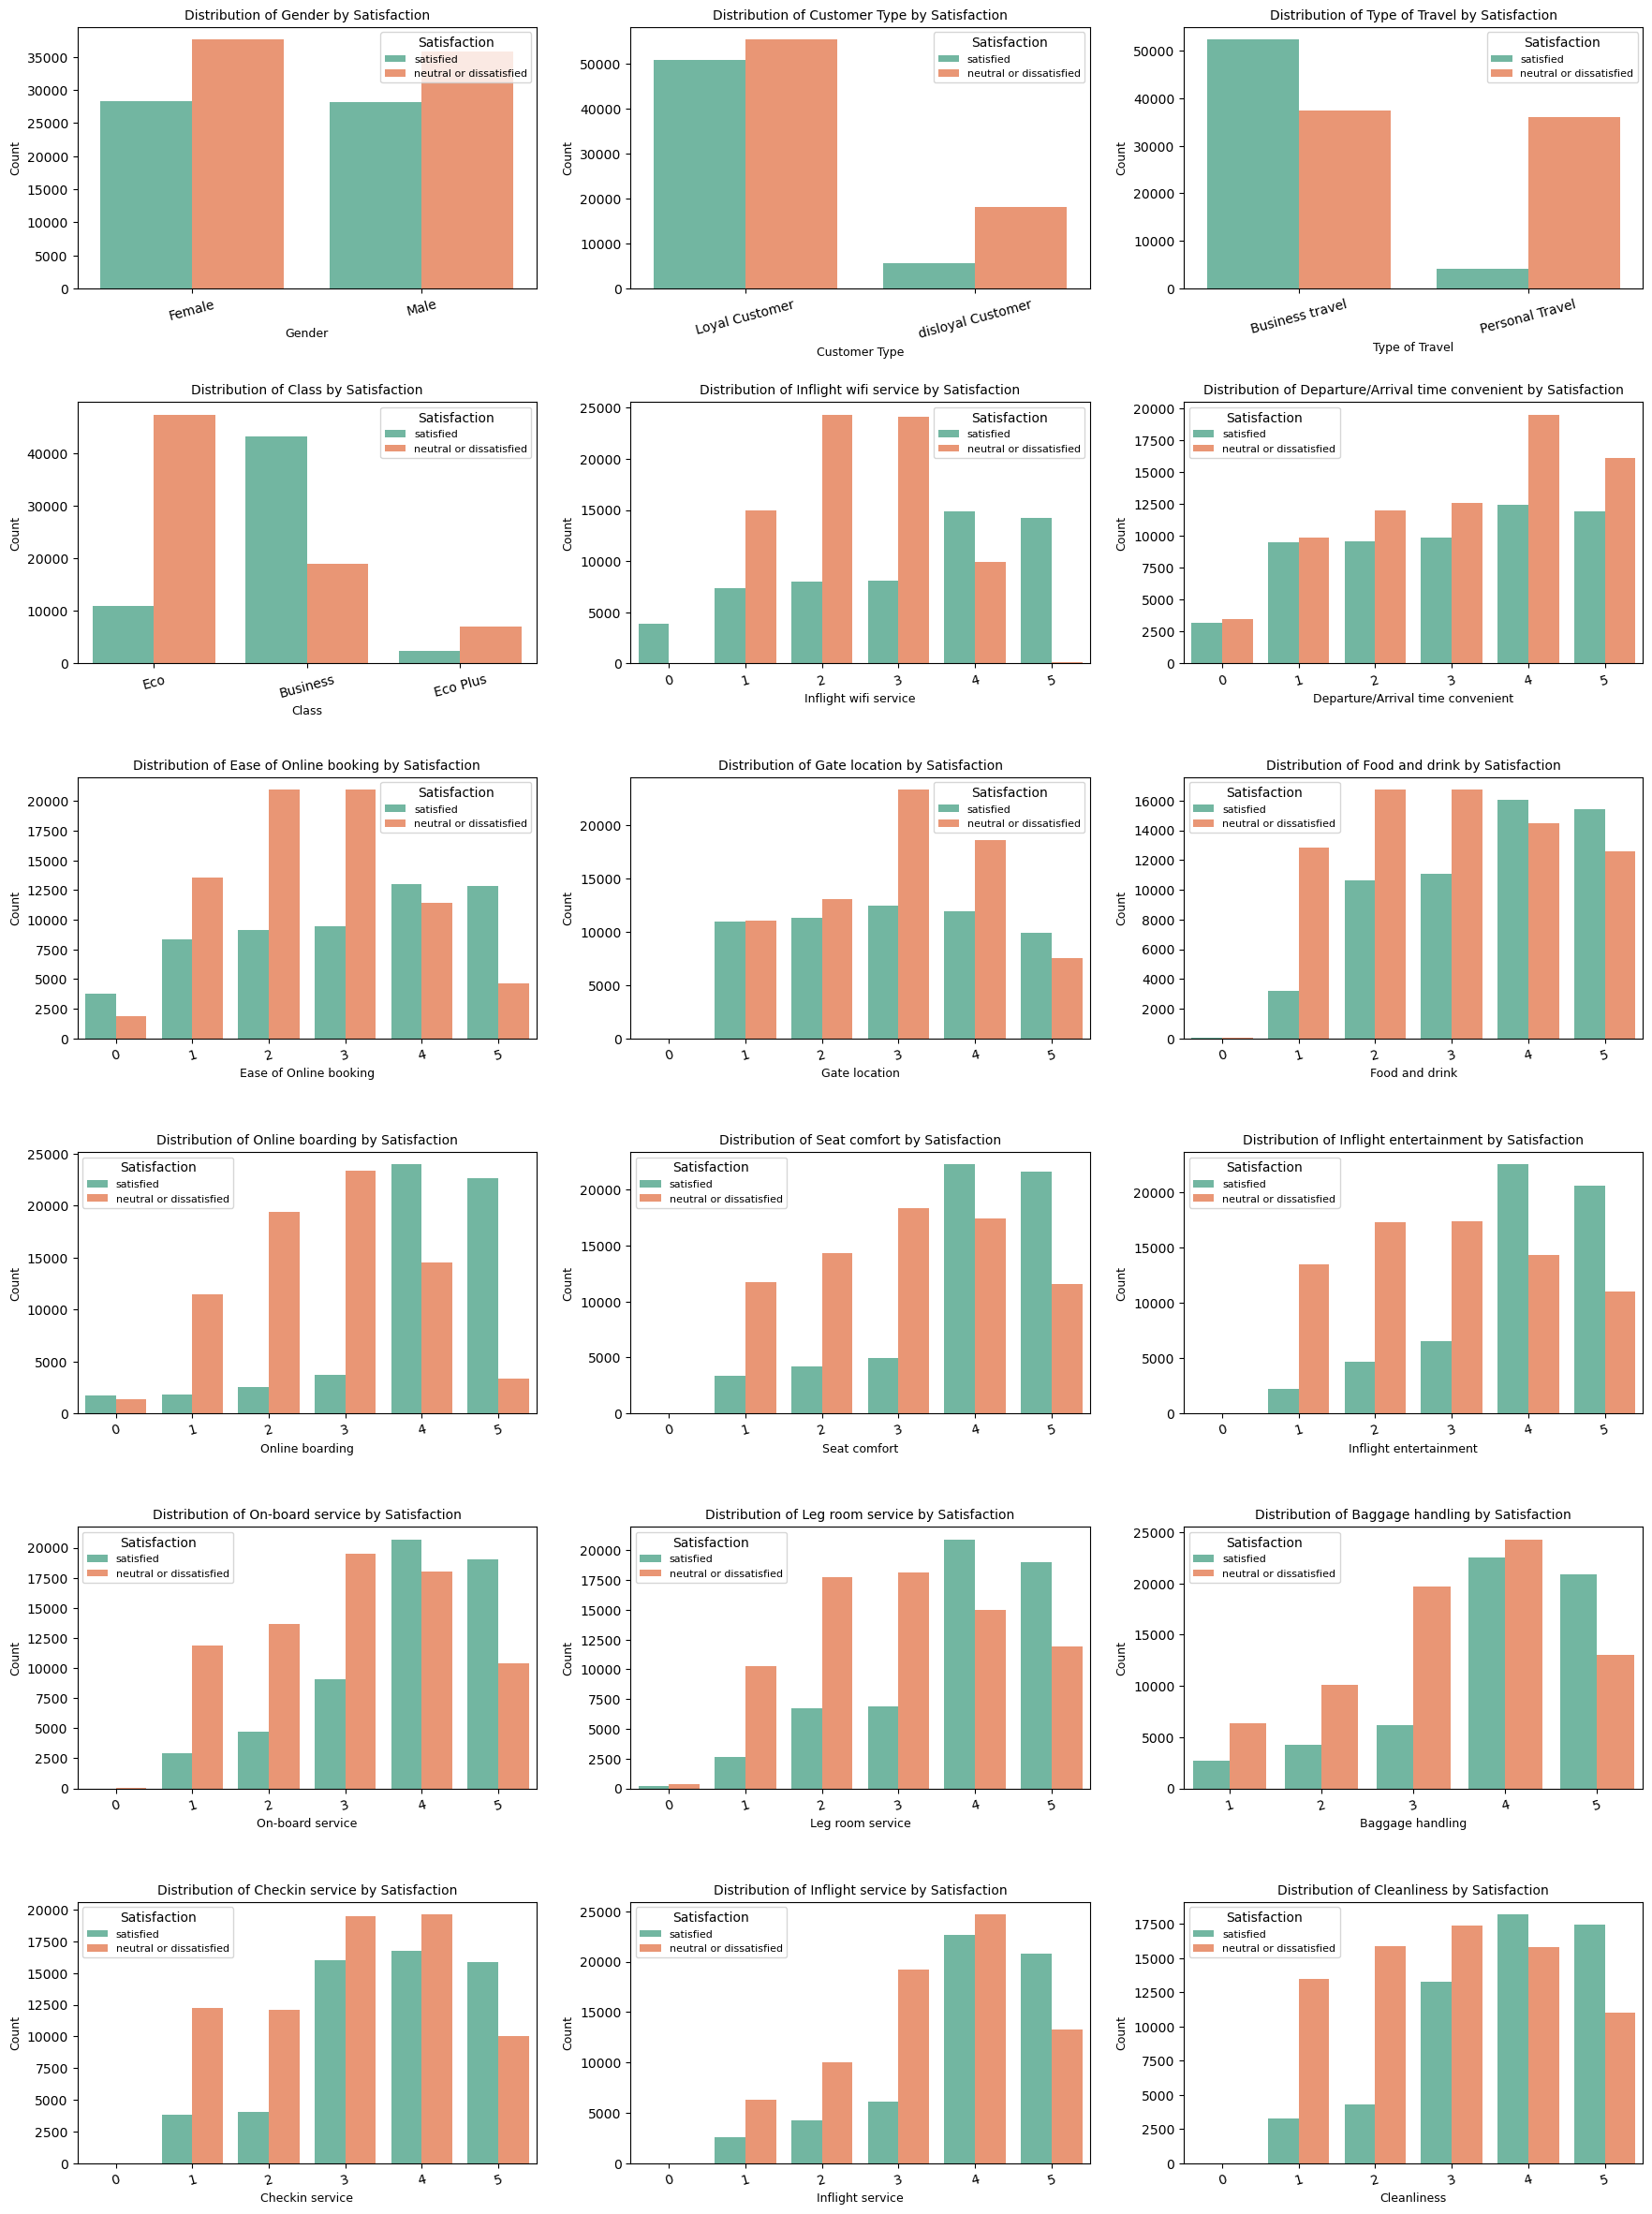

In [60]:
# ================ 1. CATEGORICAL VARIABLES ================
plt.figure(figsize=(18, 24))  

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)  
    sns.countplot(data=df_raw, x=col, hue=target_col, palette='Set2')
    plt.title(f'Distribution of {col} by Satisfaction', fontsize=10)  
    plt.xticks(rotation=15)  
    plt.xlabel(col, fontsize=9)  
    plt.ylabel('Count', fontsize=9)  
    plt.legend(title='Satisfaction', fontsize=8)  

plt.tight_layout(pad=2.0)  
plt.show()

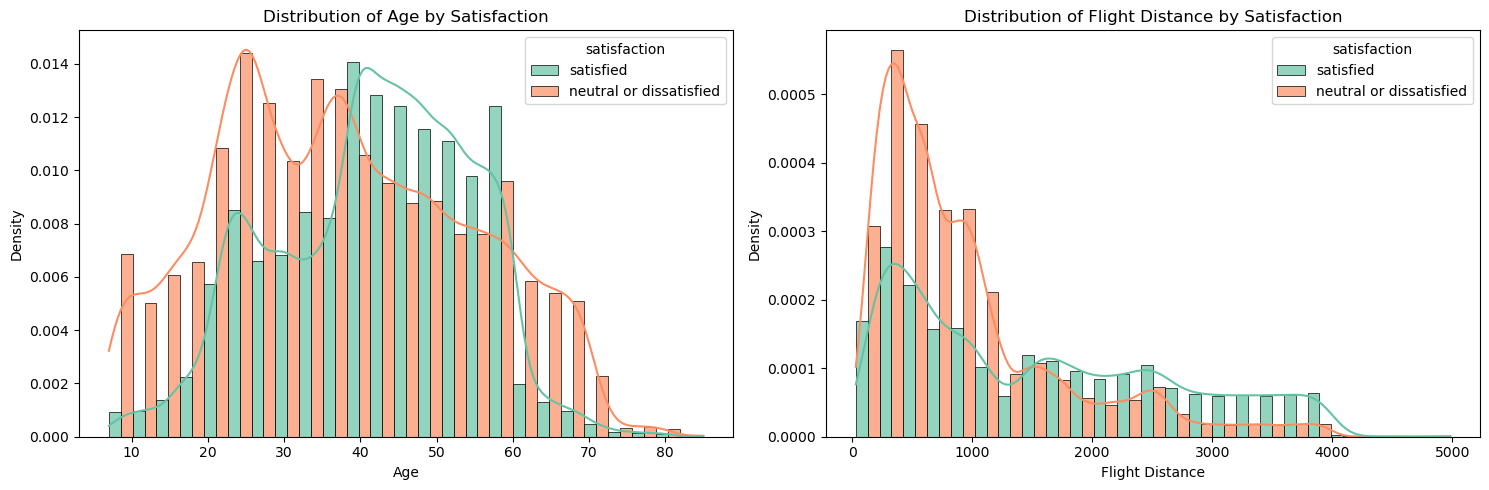

In [61]:
# ================ 2. NUMERICAL VARIABLES ================

delay_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
other_cols = [col for col in numerical_cols if col not in delay_cols]

# ============ 第一部分：普通数值变量（最多2个）============
if other_cols:
    n_other = len(other_cols)
    plt.figure(figsize=(15, 4 * n_other // 2 + 1))
    for i, col in enumerate(other_cols, 1):
        plt.subplot((n_other + 1) // 2, 2, i)
        sns.histplot(
            data=df_raw,
            x=col,
            hue=target_col,
            kde=True,
            bins=25,
            palette='Set2',
            stat='density',
            alpha=0.7,
            multiple="dodge",
            edgecolor='black',
            linewidth=0.5
        )
        plt.title(f'Distribution of {col} by Satisfaction')
        plt.xlabel(col)
        plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


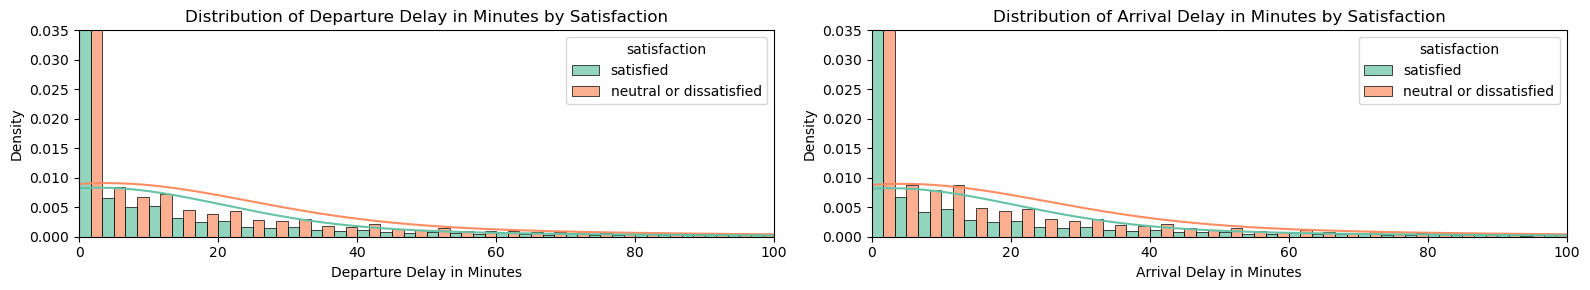

In [62]:
# ============ 第二部分：延迟变量（单独优化）============
if delay_cols:
    plt.figure(figsize=(16, 3))  # 一行两图，宽一点
    for i, col in enumerate(delay_cols, 1):
        plt.subplot(1, 2, i)
        sns.histplot(
            data=df_raw,
            x=col,
            hue=target_col,
            kde=True,
            bins=30,
            palette='Set2',
            stat='density',
            alpha=0.7,
            multiple="dodge",
            edgecolor='black',
            linewidth=0.5,
            # 👇 关键：限制 x 轴范围 + 控制 KDE
            binrange=(0, 100),
            kde_kws={"clip": (0, 100), "bw_method": 0.5}
        )
        plt.title(f'Distribution of {col} by Satisfaction')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.xlim(0, 100)  # 确保 x 轴只显示 0~200
        plt.ylim(0, 0.035)  # 可选：固定 y 轴上限，避免 KDE 高峰压扁
    plt.tight_layout()
    plt.show()

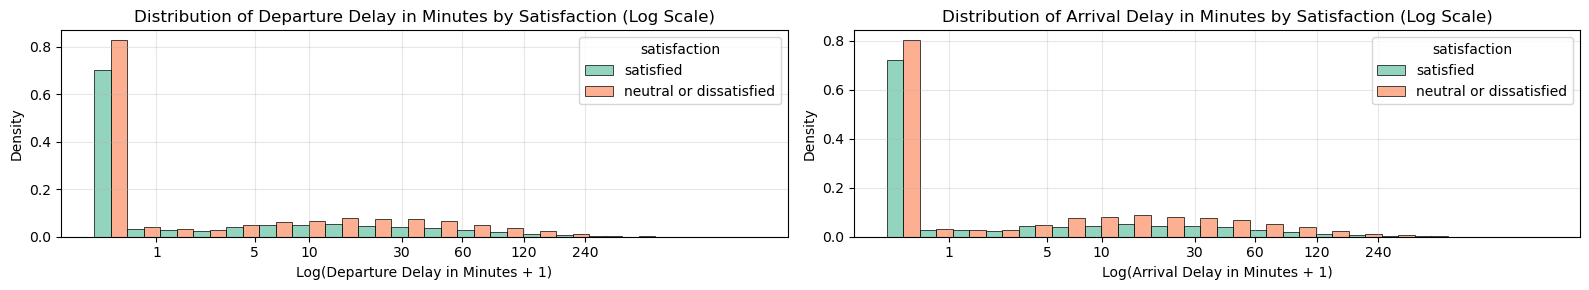

In [63]:
delay_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(16, 3))
for i, col in enumerate(delay_cols, 1):
    plt.subplot(1, 2, i)
    
    # 👇 创建新列：log(delay + 1)，避免 log(0)
    df_plot = df_raw.copy()
    df_plot[f'log_{col}'] = np.log(df_plot[col] + 1)
    
    sns.histplot(
        data=df_plot,
        x=f'log_{col}',
        hue=target_col,
        kde=False,  # 👈 关闭 KDE，避免干扰
        bins=20,
        palette='Set2',
        stat='density',
        alpha=0.7,
        multiple="dodge",
        edgecolor='black',
        linewidth=0.5
    )
    plt.title(f'Distribution of {col} by Satisfaction (Log Scale)')
    plt.xlabel(f'Log({col} + 1)')  # 标注清楚是 log 变换
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    
    # 👇 设置 x 轴刻度更合理（可选）
    ticks = np.log(np.array([1, 5, 10, 30, 60, 120, 240]) + 1)  # 原始分钟数对应的 log 值
    plt.xticks(ticks, [1, 5, 10, 30, 60, 120, 240])  # 显示原始分钟数
    
plt.tight_layout()
plt.show()

# 5 Data Preprocessing

In [64]:
# Handle missing values
initial_shape = df.shape
df = df.dropna()
final_shape = df.shape
rows_dropped = initial_shape[0] - final_shape[0]
print(f"🗑️ Dropped {rows_dropped} rows with missing values. New size: {final_shape[0]}")


🗑️ Dropped 393 rows with missing values. New size: 129487


# 6 Feature Engineering

In [65]:
# Service score aggregation
service_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink', 
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service', 'Cleanliness'
]
df['Total Service Score'] = df[service_columns].sum(axis=1)

# Net delay calculation
df['Total length of delayed flights'] = (
    df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']
)

# Age Group (quantile-based)
df['Age Group'] = pd.qcut(df['Age'], q=4, labels=['Teen', 'Adult', 'Middle', 'Senior'])

# Flight Distance Category (business logic)
distance_bins = [0, 500, 2000, 10000]
distance_labels = ['Short', 'Medium', 'Long']
df['Flight Distance Category'] = pd.cut(
    df['Flight Distance'],
    bins=distance_bins,
    labels=distance_labels,
    include_lowest=True
)

print("✅ Feature engineering completed.")

✅ Feature engineering completed.


??偏态处理

In [66]:
# print("\n🔍 Skewness analysis for log(1+x) transformation (BEFORE vs AFTER):")

# # Candidate continuous features (exclude known binaries/categoricals)
# exclude_cols = [
#     'id', 'satisfaction', 
#     'Gender', 'Customer Type', 'Type of Travel', 'Class',  # Raw categoricals
#     'Premium Travel Flag'  # Binary flag
# ]

# # Identify numeric columns not in exclude list
# numeric_cols = [
#     col for col in df.select_dtypes(include=np.number).columns 
#     if col not in exclude_cols
# ]

# # Filter out likely categorical/ordinal features
# continuous_cols = []
# for col in numeric_cols:
#     if df[col].nunique() <= 10:  # Skip low-cardinality features (likely ordinal)
#         continue
#     continuous_cols.append(col)

# print(f"   Candidate continuous features: {continuous_cols}\n")

# # Apply log(1+x) to significantly skewed features (|skew| > 1.0) and SHOW IMPROVEMENT
# skew_threshold = 1.0
# log_features_created = []

# for col in continuous_cols:
#     # Calculate GLOBAL skewness (whole dataset) - BEFORE transformation
#     original_skew = skew(df[col].dropna())
    
#     # Only consider for transformation if |skew| > threshold
#     if abs(original_skew) <= skew_threshold:
#         print(f"   → {col:30} | Original skew: {original_skew:6.2f} → NO TRANSFORMATION")
#         continue
    
#     # Handle negative values SAFELY using GLOBAL minimum
#     min_val = df[col].min()
#     if min_val < 0:
#         # Shift to make all values positive (using global min)
#         shift = abs(min_val) + 1  # Ensure all values >= 1 after shift
#         shifted_col = df[col] + shift
#         shift_info = f"(shifted by +{shift:.1f})"
#     else:
#         shifted_col = df[col]
#         shift_info = "(no shift needed)"
    
#     # Create log(1+x) transformed feature
#     log_col = f"{col}_log"
#     df[log_col] = np.log1p(shifted_col)  # EXACTLY log(1+x)
    
#     # Calculate skew AFTER transformation
#     transformed_skew = skew(df[log_col].dropna())
    
#     # Print comprehensive before/after comparison
#     print(f"   → {col:30} | BEFORE: skew={original_skew:6.2f} → AFTER: skew={transformed_skew:6.2f} | {shift_info} → CREATED '{log_col}'")
    
#     log_features_created.append(log_col)

# # Special handling for delay magnitude (business logic)
# if 'Total length of delayed flights' in df.columns:
#     # Take absolute value first (magnitude matters more than sign)
#     df['Delay_Abs'] = np.abs(df['Total length of delayed flights'])
    
#     # Calculate skew BEFORE transformation
#     original_delay_skew = skew(df['Delay_Abs'].dropna())
    
#     if abs(original_delay_skew) > skew_threshold:
#         # Apply EXACTLY log(1+x)
#         df['Delay_Abs_log'] = np.log1p(df['Delay_Abs'])  # EXACTLY log(1+x)
        
#         # Calculate skew AFTER transformation
#         transformed_delay_skew = skew(df['Delay_Abs_log'].dropna())
        
#         print(f"   → {'Delay_Abs':30} | BEFORE: skew={original_delay_skew:6.2f} → AFTER: skew={transformed_delay_skew:6.2f} | (no shift needed) → CREATED 'Delay_Abs_log'")
#         log_features_created.append('Delay_Abs_log')
#     else:
#         print(f"   → {'Delay_Abs':30} | Original skew: {original_delay_skew:6.2f} → NO TRANSFORMATION")

# print(f"\n✅ Log(1+x) transformation summary:")
# print(f"   - {len(log_features_created)} new log-transformed features created")
# print(f"   - Average skew reduction: {np.mean([abs(skew(df[col].dropna())) for col in log_features_created]):.2f} → {np.mean([abs(skew(df[col+'_log'].dropna())) for col in log_features_created if col+'_log' in df.columns]):.2f}")

# 7 categoroical encoding

In [77]:
df = df.drop(columns=['id'], errors='ignore')
df_raw = df.copy()
target_col = 'satisfaction'

original_object_cols = df.select_dtypes(include=['object']).columns.tolist()
if target_col in original_object_cols:
    original_object_cols.remove(target_col)

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

numerical_cols = [col for col in numerical_cols if col not in ['Flight Distance Category', 'Age Group']]

ordered_cate_cols = []
candidate_cols = numerical_cols.copy()
for col in candidate_cols:
    col_vals = df[col].dropna()
    if len(col_vals) == 0:
        continue
    val_min, val_max = col_vals.min(), col_vals.max()
    if not (val_min >= 0 and val_max <= 5):
        continue
    if np.issubdtype(col_vals.dtype, np.floating):
        if not np.all(col_vals == col_vals.astype(int)):
            continue
    ordered_cate_cols.append(col)

numerical_cols = [col for col in numerical_cols if col not in ordered_cate_cols]

numerical_cols += ['Total Service Score', 'Total length of delayed flights']
ordered_cate_cols += ['Flight Distance Category']  
original_object_cols += ['Age Group']  

from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
df[target_col] = le_target.fit_transform(df[target_col])

distance_mapping = {'Short': 0, 'Medium': 1, 'Long': 2}
df['Flight Distance Category'] = df['Flight Distance Category'].map(distance_mapping)

df = pd.get_dummies(
    df,
    columns=original_object_cols,
    prefix=original_object_cols,
    drop_first=True
)

feature_cols = [col for col in df.columns if col != target_col]
print("✅ Final feature composition:")

print(f"  - Continuous: {len([c for c in feature_cols if c in numerical_cols])}")
print(f"  - Ordinal:    {len([c for c in feature_cols if c in ordered_cate_cols])}")
print(f"  - One-Hot:    {len(feature_cols) - len(numerical_cols) - len(ordered_cate_cols)}")
print(f"  - Shape:      {df.shape}")

KeyError: "None of [Index(['Age Group'], dtype='object')] are in the [columns]"

In [69]:
feature_cols = [col for col in df.columns if col != target_col]

# 分类变量（保持与你原有逻辑一致）
continuous_features = [c for c in feature_cols if c in numerical_cols]
ordinal_features = [c for c in feature_cols if c in ordered_cate_cols]
one_hot_features = [c for c in feature_cols if c not in numerical_cols and c not in ordered_cate_cols]

print("✅ Final feature composition:")
print(f"\n🔢 Continuous numerical features ({len(continuous_features)}):")
print("  ", continuous_features)

print(f"\n📏 Ordinal features ({len(ordinal_features)}):")
print("  ", ordinal_features)

print(f"\n🏷️  One-Hot encoded features ({len(one_hot_features)}):")
print("  ", one_hot_features)

print(f"\n📊 Final shape: {df.shape}")

✅ Final feature composition:

🔢 Continuous numerical features (6):
   ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Service Score', 'Total length of delayed flights']

📏 Ordinal features (15):
   ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Flight Distance Category']

🏷️  One-Hot encoded features (8):
   ['Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus', 'Age Group_Adult', 'Age Group_Middle', 'Age Group_Senior']

📊 Final shape: (129487, 30)


# 8 Train-Test Split

In [70]:
# Separate features and target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Stratified split (only once!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Split completed. Train: {X_train.shape}, Test: {X_test.shape}")

✅ Split completed. Train: (103589, 29), Test: (25898, 29)


# 9 Feature Scaling

In [75]:
# ✅ 显式定义哪些列需要标准化：
# 所有数值列 - (二元/One-Hot列 + 有序变量列)
exclude_from_scaling = set()

# 1. 添加所有 0/1 列（One-Hot + 原始二元变量）
binary_or_ohe_cols = [
    col for col in X.columns
    if X[col].nunique() == 2 and X[col].isin([0, 1]).all()
]
exclude_from_scaling.update(binary_or_ohe_cols)

# 2. ⭐⭐⭐ 关键：添加所有有序变量（0-5分 + Flight Distance Category）
# 假设 ordered_cate_cols 是你前面已定义的列表（包含15个特征）
exclude_from_scaling.update(ordered_cate_cols)

# 3. 连续变量 = 数值列中不在 exclude_from_scaling 的列
continuous_cols = [
    col for col in X.select_dtypes(include=np.number).columns
    if col not in exclude_from_scaling
]

print(f"🔍 Excluding {len(exclude_from_scaling)} features from scaling:")
print(f"   - Binary/One-Hot: {len(binary_or_ohe_cols)}")
print(f"   - Ordinal (0-5, etc.): {len(ordered_cate_cols)}")
print(f"🔧 Scaling {len(continuous_cols)} continuous features: {continuous_cols}")

🔍 Excluding 23 features from scaling:
   - Binary/One-Hot: 8
   - Ordinal (0-5, etc.): 15
🔧 Scaling 6 continuous features: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Service Score', 'Total length of delayed flights']


In [76]:
# Apply StandardScaler only to continuous features
scaler = StandardScaler()
scaler.fit(X_train[continuous_cols])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

# Final datasets
X_train_scaled_final = X_train_scaled  # All features, continuous scaled
X_test_scaled_final = X_test_scaled

X_train_nonscaled_final = X_train      # All features, no scaling
X_test_nonscaled_final = X_test

# Save for model training
scaled_train = (X_train_scaled_final, y_train)
scaled_test = (X_test_scaled_final, y_test)
nonscaled_train = (X_train_nonscaled_final, y_train)
nonscaled_test = (X_test_nonscaled_final, y_test)

print("✅ Scaling completed.")
print(f"   Scaled train shape: {X_train_scaled_final.shape}")
print(f"   Non-scaled train shape: {X_train_nonscaled_final.shape}")


✅ Scaling completed.
   Scaled train shape: (103589, 29)
   Non-scaled train shape: (103589, 29)


# Round 1

In [65]:
# Initialize global results list
all_results = []

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Evaluate a binary classifier, plot ROC, print metrics, and auto-collect results.
    """
    global all_results  # allow modification of global list
    
    start_time = time.time()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_proba)
    run_time = time.time() - start_time
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', color='blue', lw=2)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Assemble results
    results = {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc,
        'Running Time (s)': run_time
    }
    
    # Print
    print(f"✅ {model_name} Results:")
    for k, v in results.items():
        if k != 'Model':
            print(f"   {k}: {v:.4f}")
    print("-" * 50)
    
    # Auto-collect
    all_results.append(results)
    
    return results

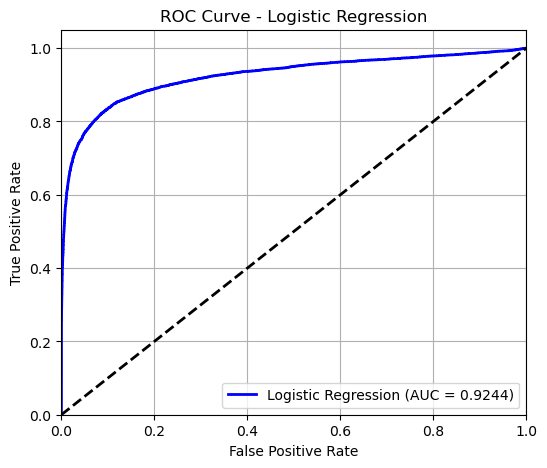

✅ Logistic Regression Results:
   Accuracy: 0.8726
   Precision: 0.8706
   Recall: 0.8303
   F1 Score: 0.8499
   AUC: 0.9244
   Running Time (s): 0.3149
--------------------------------------------------


In [66]:
from sklearn.linear_model import LogisticRegression

# Initialize model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Evaluate using the unified function
results_lr = evaluate_model(
    model=lr,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Logistic Regression"
)

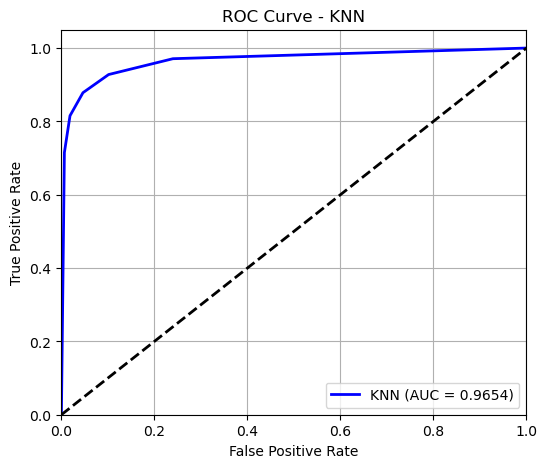

✅ KNN Results:
   Accuracy: 0.9209
   Precision: 0.9357
   Recall: 0.8783
   F1 Score: 0.9061
   AUC: 0.9654
   Running Time (s): 7.0697
--------------------------------------------------


{'Model': 'KNN',
 'Accuracy': 0.9208819213838907,
 'Precision': 0.9357129331565991,
 'Recall': 0.8782546876388518,
 'F1 Score': 0.906073802429521,
 'AUC': 0.9653717985814155,
 'Running Time (s)': 7.069677114486694}

In [67]:
# %% [markdown]
# ## Model 2: K-Nearest Neighbors (KNN)

# %%
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)

# Evaluate and auto-collect results
evaluate_model(
    model=knn,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="KNN"
)

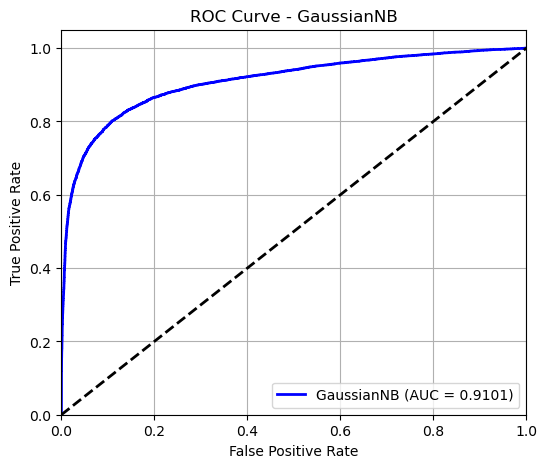

✅ GaussianNB Results:
   Accuracy: 0.8519
   Precision: 0.8502
   Recall: 0.8002
   F1 Score: 0.8244
   AUC: 0.9101
   Running Time (s): 0.1714
--------------------------------------------------


{'Model': 'GaussianNB',
 'Accuracy': 0.8519190671094293,
 'Precision': 0.8501699395770392,
 'Recall': 0.8002310494979117,
 'F1 Score': 0.8244449530785076,
 'AUC': 0.9101455498972892,
 'Running Time (s)': 0.17139434814453125}

In [68]:
# %% [markdown]
# ## Model 3: Gaussian Naive Bayes

# %%
from sklearn.naive_bayes import GaussianNB

# Initialize model
nb = GaussianNB()

# Evaluate and auto-collect results
evaluate_model(
    model=nb,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="GaussianNB"
)

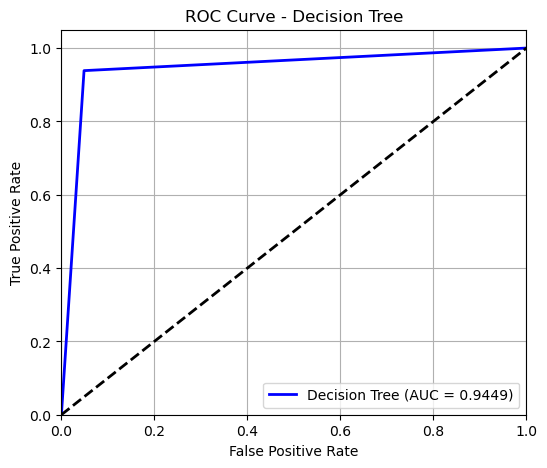

✅ Decision Tree Results:
   Accuracy: 0.9457
   Precision: 0.9368
   Recall: 0.9384
   F1 Score: 0.9376
   AUC: 0.9449
   Running Time (s): 1.4971
--------------------------------------------------


{'Model': 'Decision Tree',
 'Accuracy': 0.9457100934435092,
 'Precision': 0.9367515302049144,
 'Recall': 0.9384164222873901,
 'F1 Score': 0.9375832371481844,
 'AUC': 0.9448654320381983,
 'Running Time (s)': 1.4970519542694092}

In [69]:
# %% [markdown]
# ## Model 4: Decision Tree

# %%
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Evaluate and auto-collect results
evaluate_model(
    model=dt,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Decision Tree"
)

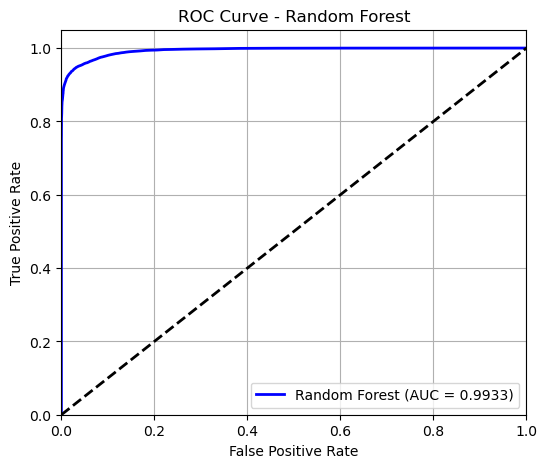

✅ Random Forest Results:
   Accuracy: 0.9601
   Precision: 0.9712
   Recall: 0.9359
   F1 Score: 0.9533
   AUC: 0.9933
   Running Time (s): 2.8093
--------------------------------------------------


{'Model': 'Random Forest',
 'Accuracy': 0.9601127500193065,
 'Precision': 0.9712283290298783,
 'Recall': 0.9359281969252644,
 'F1 Score': 0.9532515726116667,
 'AUC': 0.9932817005029454,
 'Running Time (s)': 2.809252977371216}

In [70]:
# %% [markdown]
# ## Model 5: Random Forest

# %%
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Evaluate and auto-collect results
evaluate_model(
    model=rf,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Random Forest"
)

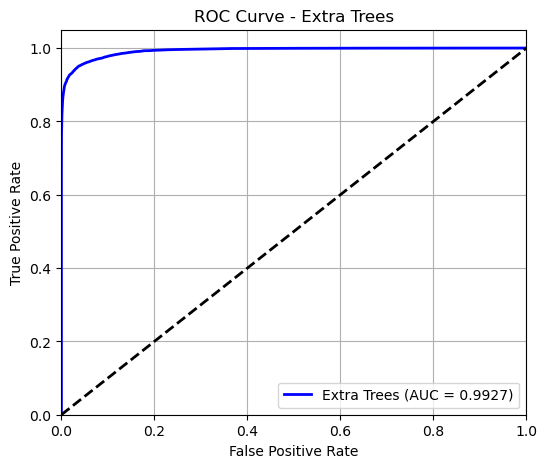

✅ Extra Trees Results:
   Accuracy: 0.9576
   Precision: 0.9692
   Recall: 0.9320
   F1 Score: 0.9503
   AUC: 0.9927
   Running Time (s): 2.2964
--------------------------------------------------


{'Model': 'Extra Trees',
 'Accuracy': 0.9576029036991274,
 'Precision': 0.9692265040199611,
 'Recall': 0.932018128499067,
 'F1 Score': 0.950258222343028,
 'AUC': 0.9926792861306559,
 'Running Time (s)': 2.296351194381714}

In [71]:
# %% [markdown]
# ## Model 6: Extra Trees

# %%
from sklearn.ensemble import ExtraTreesClassifier

# Initialize model
et = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Evaluate and auto-collect results
evaluate_model(
    model=et,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Extra Trees"
)

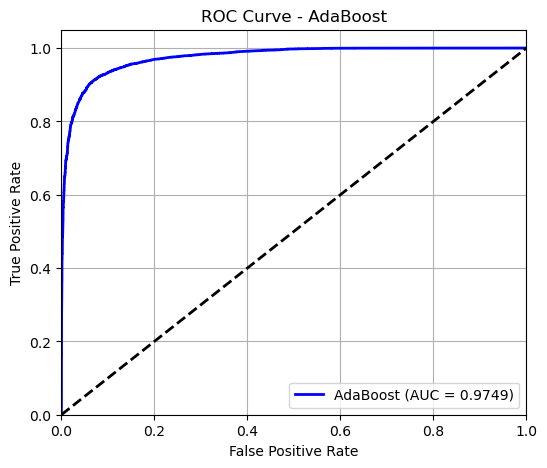

✅ AdaBoost Results:
   Accuracy: 0.9227
   Precision: 0.9164
   Recall: 0.9046
   F1 Score: 0.9105
   AUC: 0.9749
   Running Time (s): 16.1812
--------------------------------------------------


{'Model': 'AdaBoost',
 'Accuracy': 0.9226967333384818,
 'Precision': 0.9163741110811054,
 'Recall': 0.9046476495156847,
 'F1 Score': 0.9104731240497272,
 'AUC': 0.9749376859012627,
 'Running Time (s)': 16.181167602539062}

In [72]:
# %% [markdown]
# ## Model 7: AdaBoost

# %%
from sklearn.ensemble import AdaBoostClassifier

# Initialize base estimator (Decision Tree with max_depth=1 as default)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Evaluate and auto-collect results
evaluate_model(
    model=ada,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="AdaBoost"
)

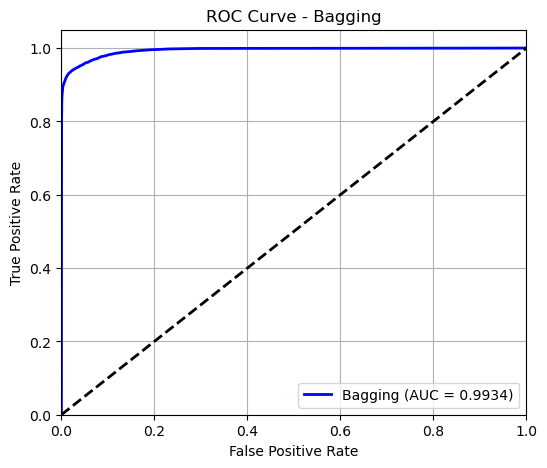

✅ Bagging Results:
   Accuracy: 0.9605
   Precision: 0.9700
   Recall: 0.9381
   F1 Score: 0.9538
   AUC: 0.9934
   Running Time (s): 19.6668
--------------------------------------------------


{'Model': 'Bagging',
 'Accuracy': 0.960498880222411,
 'Precision': 0.9699558985667034,
 'Recall': 0.9381498267128766,
 'F1 Score': 0.9537877761214256,
 'AUC': 0.9934211147881902,
 'Running Time (s)': 19.666818857192993}

In [73]:
# %% [markdown]
# ## Model 8: Bagging Classifier

# %%
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Bagging with Decision Tree as base estimator
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Evaluate and auto-collect results
evaluate_model(
    model=bag,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Bagging"
)

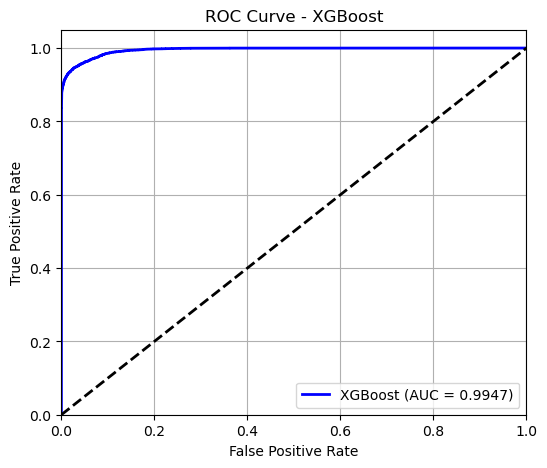

✅ XGBoost Results:
   Accuracy: 0.9613
   Precision: 0.9704
   Recall: 0.9397
   F1 Score: 0.9548
   AUC: 0.9947
   Running Time (s): 0.6548
--------------------------------------------------


{'Model': 'XGBoost',
 'Accuracy': 0.9613483666692408,
 'Precision': 0.9704478707782672,
 'Recall': 0.9396605349684528,
 'F1 Score': 0.9548060860535464,
 'AUC': 0.9947206825040882,
 'Running Time (s)': 0.6547901630401611}

In [74]:
# %% [markdown]
# ## Model 9: XGBoost

# %%
from xgboost import XGBClassifier

# Initialize model with default parameters
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # suppress warning
    eval_metric='logloss'     # suppress warning
)

# Evaluate and auto-collect results
evaluate_model(
    model=xgb,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="XGBoost"
)

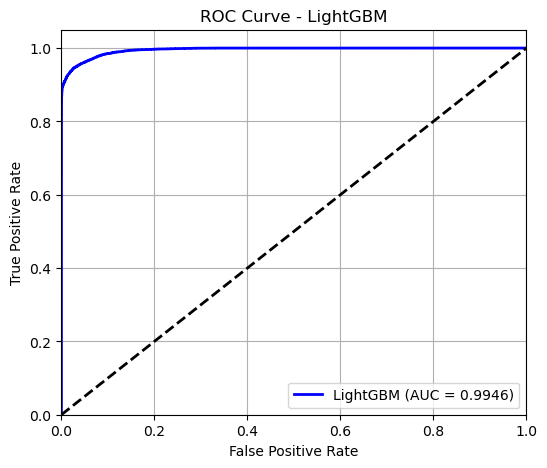

✅ LightGBM Results:
   Accuracy: 0.9610
   Precision: 0.9733
   Recall: 0.9359
   F1 Score: 0.9542
   AUC: 0.9946
   Running Time (s): 0.8361
--------------------------------------------------


{'Model': 'LightGBM',
 'Accuracy': 0.9610008494864468,
 'Precision': 0.9732926716569633,
 'Recall': 0.9359281969252644,
 'F1 Score': 0.9542448129020568,
 'AUC': 0.9945967081286955,
 'Running Time (s)': 0.8361458778381348}

In [75]:
# %% [markdown]
# ## Model 10: LightGBM

# %%
from lightgbm import LGBMClassifier

# Initialize model with default parameters
lgb = LGBMClassifier(
    random_state=42,
    verbose=-1  # suppress training logs
)

# Evaluate and auto-collect results
evaluate_model(
    model=lgb,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="LightGBM"
)

### Model 11: Multi-Layer Perceptron (MLP)

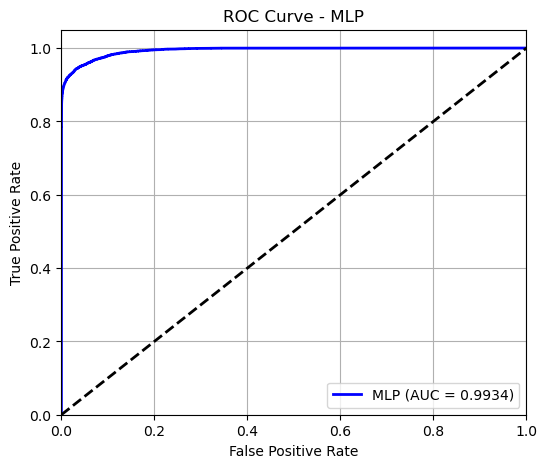

✅ MLP Results:
   Accuracy: 0.9570
   Precision: 0.9568
   Recall: 0.9437
   F1 Score: 0.9502
   AUC: 0.9934
   Running Time (s): 141.1485
--------------------------------------------------


{'Model': 'MLP',
 'Accuracy': 0.9569850953741602,
 'Precision': 0.9567528606180737,
 'Recall': 0.9436594685861548,
 'F1 Score': 0.9501610594130279,
 'AUC': 0.9934268823788031,
 'Running Time (s)': 141.14845895767212}

In [76]:
from sklearn.neural_network import MLPClassifier

# Initialize model
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=500,
    random_state=42
)

# Evaluate and auto-collect results
evaluate_model(
    model=mlp,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="MLP"
)

### Final Results Summary

In [77]:
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Reorder columns to match your requested metrics
results_df = results_df[[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Running Time (s)'
]]

# Sort by AUC
results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# Display
print("📊 Final Model Comparison:")
display(results_df)

# Save to CSV
results_df.to_csv("round1_results.csv", index=False)

📊 Final Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score,AUC,Running Time (s)
0,XGBoost,0.961348,0.970448,0.939661,0.954806,0.994721,0.654790
1,LightGBM,0.961001,0.973293,0.935928,0.954245,0.994597,0.836146
2,MLP,0.956985,0.956753,0.943659,0.950161,0.993427,141.148459
3,Bagging,0.960499,0.969956,0.938150,0.953788,0.993421,19.666819
4,Random Forest,0.960113,0.971228,0.935928,0.953252,0.993282,2.809253
5,Extra Trees,0.957603,0.969227,0.932018,0.950258,0.992679,2.296351
6,AdaBoost,0.922697,0.916374,0.904648,0.910473,0.974938,16.181168
7,KNN,0.920882,0.935713,0.878255,0.906074,0.965372,7.069677
8,Decision Tree,0.945710,0.936752,0.938416,0.937583,0.944865,1.497052
9,Logistic Regression,0.872616,0.870574,0.830267,0.849943,0.924401,0.314914


# Round 2

In [78]:
from sklearn.model_selection import GridSearchCV

all_results_round2 = []

def tune_and_evaluate(
    model,
    param_grid,
    X_train,
    X_test,
    y_train,
    y_test,
    model_name,
    is_scaled=True,
    cv=3
):
    """
    Tune hyperparameters using GridSearchCV and evaluate best model.
    Automatically appends result to all_results_round2.
    """
    global all_results_round2
    
    print(f"🔍 Tuning {model_name}...")
    
    # Grid Search with cross-validation
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1',          # optimize for F1 (good for imbalanced binary)
        cv=cv,
        n_jobs=-1,
        verbose=0
    )
    
    # Fit on training data
    grid.fit(X_train, y_train)
    
    print(f"   Best params: {grid.best_params_}")
    
    # Use best estimator for final evaluation
    best_model = grid.best_estimator_
    
    # Reuse the same evaluate_model logic (but collect in new list)
    start_time = time.time()
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    run_time = time.time() - start_time
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_proba)
    
    # Store result
    results = {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc,
        'Running Time (s)': run_time,
        'Best Parameters': grid.best_params_
    }
    
    all_results_round2.append(results)
    
    print(f"✅ {model_name} (Tuned) - F1: {f1:.4f}, AUC: {auc:.4f}")
    print("-" * 50)
    
    return best_model, grid.best_params_

### 1. Logistic Regression (Tuned)

In [79]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

tune_and_evaluate(
    model=lr,
    param_grid=param_grid_lr,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Logistic Regression"
)

🔍 Tuning Logistic Regression...
   Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Logistic Regression (Tuned) - F1: 0.8497, AUC: 0.9244
--------------------------------------------------


(LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear'),
 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'})

### 2. K-Nearest Neighbors (Tuned)


In [80]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

tune_and_evaluate(
    model=knn,
    param_grid=param_grid_knn,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="KNN"
)

🔍 Tuning KNN...
   Best params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
✅ KNN (Tuned) - F1: 0.9187, AUC: 0.9785
--------------------------------------------------


(KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance'),
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'})

### 3. Gaussian Naive Bayes (Tuned)

In [81]:
# GaussianNB has no major hyperparameters, but we can tune var_smoothing
nb = GaussianNB()
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

tune_and_evaluate(
    model=nb,
    param_grid=param_grid_nb,
    X_train=X_train_scaled_final,
    X_test=X_test_scaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="GaussianNB"
)

🔍 Tuning GaussianNB...
   Best params: {'var_smoothing': 1e-09}
✅ GaussianNB (Tuned) - F1: 0.8244, AUC: 0.9101
--------------------------------------------------


(GaussianNB(), {'var_smoothing': 1e-09})

### 4-1 Decision Tree (Tuned)

In [82]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tune_and_evaluate(
    model=dt,
    param_grid=param_grid_dt,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Decision Tree"
)

🔍 Tuning Decision Tree...
   Best params: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
✅ Decision Tree (Tuned) - F1: 0.9466, AUC: 0.9744
--------------------------------------------------


(DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                        min_samples_split=10, random_state=42),
 {'criterion': 'entropy',
  'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 10})

### 4-2 Decision Tree (Tuned via Cost-Complexity Pruning)

In [ ]:
# Create validation set
X_train_temp, X_val, y_train_temp, y_val = train_test_split(
    X_train_nonscaled_final, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Step 1: Compute pruning path with a reasonable max_depth to limit alphas
clf = DecisionTreeClassifier(random_state=42, max_depth=20)  # limit depth to reduce alphas
path = clf.cost_complexity_pruning_path(X_train_temp, y_train_temp)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Optional: filter out alphas that lead to trivial trees (e.g., only root)
# Keep alphas where impurity drop is meaningful
# Or simply take unique alphas and limit count
ccp_alphas = np.unique(ccp_alphas)  # remove duplicates

# Further reduce: log-uniform sampling if too many
MAX_ALPHAS = 200  # adjust based on speed needs
if len(ccp_alphas) > MAX_ALPHAS:
    indices = np.round(np.logspace(0, np.log10(len(ccp_alphas)-1), MAX_ALPHAS)).astype(int)
    indices = np.unique(indices)
    ccp_alphas = ccp_alphas[indices]

# Sort alphas (they should be, but just in case)
ccp_alphas = np.sort(ccp_alphas)

# Step 2: Train trees with early stopping
best_f1 = -1
best_alpha = 0
best_dt = None
val_scores = []
consecutive_worse = 0
PATIENCE = 3  # stop after 3 consecutive drops

for i, alpha in enumerate(ccp_alphas):
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train_temp, y_train_temp)
    y_pred_val = dt.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val, average='binary')
    val_scores.append(f1_val)

    # Early stopping: if score starts decreasing consistently
    if f1_val > best_f1:
        best_f1 = f1_val
        best_alpha = alpha
        best_dt = dt
        consecutive_worse = 0
    else:
        consecutive_worse += 1
        if consecutive_worse >= PATIENCE and i > 5:  # allow first few
            print(f"💡 Early stopping at alpha={alpha:.6f} (index {i})")
            break

print(f"✅ Best ccp_alpha: {best_alpha:.6f} (Validation F1: {best_f1:.4f})")

# Step 3: Final evaluation on test set
start_time = time.time()
y_pred = best_dt.predict(X_test_nonscaled_final)
y_proba = best_dt.predict_proba(X_test_nonscaled_final)[:, 1]
run_time = time.time() - start_time

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

# Save result
results = {
    'Model': 'Decision Tree (Pruned)',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'AUC': auc,
    'Running Time (s)': run_time,
    'Best Parameters': {'ccp_alpha': best_alpha}
}

all_results_round2.append(results)

print(f"🎯 Decision Tree (Pruned) - Test AUC: {auc:.4f}, F1: {f1:.4f}")

💡 Early stopping at alpha=0.000002 (index 6)
✅ Best ccp_alpha: 0.000000 (Validation F1: 0.9349)
🎯 Decision Tree (Pruned) - Test AUC: 0.9404, F1: 0.9325


### 5. Random Forest (Tuned)

In [91]:
# Step 1: Use fewer estimators during search for speed
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

param_dist_rf = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # n_estimators can be fixed during search, or included with small range
}

# Use RandomizedSearchCV with 10-15 iterations
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=12,                     # only 12 random combinations
    cv=3,                          # reduce from 5 to 3 folds
    scoring='f1',                  # or 'roc_auc' if preferred
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("🚀 Starting RandomizedSearchCV for Random Forest...")
start_tune = time.time()
search.fit(X_train_nonscaled_final, y_train)
tune_time = time.time() - start_tune

print(f"✅ Best params: {search.best_params_}")
print(f"⏱️  Tuning time: {tune_time:.2f}s")

# Step 2: Retrain best model with more trees (e.g., 200 or 300)
best_rf = RandomForestClassifier(
    n_estimators=200,  # increase after finding good structure
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

start_train = time.time()
best_rf.fit(X_train_nonscaled_final, y_train)
train_time = time.time() - start_train

# Step 3: Evaluate
start_pred = time.time()
y_pred = best_rf.predict(X_test_nonscaled_final)
y_proba = best_rf.predict_proba(X_test_nonscaled_final)[:, 1]
pred_time = time.time() - start_pred

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

results = {
    'Model': 'Random Forest (Tuned)',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'AUC': auc,
    'Running Time (s)': tune_time + train_time + pred_time,
    'Best Parameters': {**search.best_params_, 'n_estimators': 200}
}

all_results_round2.append(results)  # replace roundX as needed

print(f"🎯 Random Forest (Tuned) - Test AUC: {auc:.4f}, F1: {f1:.4f}")

🚀 Starting RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
⏱️  Tuning time: 66.60s
🎯 Random Forest (Tuned) - Test AUC: 0.9932, F1: 0.9527


### 6. Extra Trees (Tuned)

In [94]:
print("🚀 Tuning Extra Trees with RandomizedSearchCV...")

# Step 1: Use moderate n_estimators during search
et = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)

param_dist_et = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Randomized search: fast approximation
search = RandomizedSearchCV(
    estimator=et,
    param_distributions=param_dist_et,
    n_iter=12,              # 12 random combos instead of 24+
    cv=3,                   # 3-fold instead of 5
    scoring='f1',           # or 'roc_auc'
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_tune = time.time()
search.fit(X_train_nonscaled_final, y_train)
tune_time = time.time() - start_tune

print(f"✅ Best Extra Trees params: {search.best_params_}")
print(f"⏱️  Tuning time: {tune_time:.2f}s")

# Step 2: Train final model with more trees (e.g., 200–300)
best_et = ExtraTreesClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

start_train = time.time()
best_et.fit(X_train_nonscaled_final, y_train)
train_time = time.time() - start_train

# Step 3: Predict & evaluate
start_pred = time.time()
y_pred = best_et.predict(X_test_nonscaled_final)
y_proba = best_et.predict_proba(X_test_nonscaled_final)[:, 1]
pred_time = time.time() - start_pred

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

# Save result
results = {
    'Model': 'Extra Trees (Tuned)',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'AUC': auc,
    'Running Time (s)': tune_time + train_time + pred_time,
    'Best Parameters': {**search.best_params_, 'n_estimators': 200}
}

all_results_round2.append(results)

print(f"🎯 Extra Trees (Tuned) - Test AUC: {auc:.4f}, F1: {f1:.4f}")

🚀 Tuning Extra Trees with RandomizedSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Extra Trees params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
⏱️  Tuning time: 54.38s
🎯 Extra Trees (Tuned) - Test AUC: 0.9925, F1: 0.9488


### 7. AdaBoost (Tuned)

In [95]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    random_state=42
)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

tune_and_evaluate(
    model=ada,
    param_grid=param_grid_ada,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="AdaBoost"
)

🔍 Tuning AdaBoost...
   Best params: {'learning_rate': 1.0, 'n_estimators': 200}
✅ AdaBoost (Tuned) - F1: 0.9156, AUC: 0.9775
--------------------------------------------------


(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                     random_state=42),
                    n_estimators=200, random_state=42),
 {'learning_rate': 1.0, 'n_estimators': 200})

### 8. Bagging Classifier (Tuned)

In [96]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42,
    n_jobs=-1
)
param_grid_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0]
}

tune_and_evaluate(
    model=bag,
    param_grid=param_grid_bag,
    X_train=X_train_nonscaled_final,
    X_test=X_test_nonscaled_final,
    y_train=y_train,
    y_test=y_test,
    model_name="Bagging"
)

🔍 Tuning Bagging...
   Best params: {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}
✅ Bagging (Tuned) - F1: 0.9553, AUC: 0.9937
--------------------------------------------------


(BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   max_features=0.8, n_estimators=100, n_jobs=-1,
                   random_state=42),
 {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100})

### 9. XGBoost (Tuned with Early Stopping)

In [97]:
# Create validation set for early stopping
X_train_temp, X_val, y_train_temp, y_val = train_test_split(
    X_train_nonscaled_final, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Define a reasonable parameter grid (smaller than full GridSearch)
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# We'll do manual grid search with early stopping
best_score = -1
best_params = None
best_model = None

print("🔍 Tuning XGBoost with early stopping...")

for max_depth in param_grid['max_depth']:
    for lr in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample in param_grid['colsample_bytree']:
                # Initialize model
                xgb = XGBClassifier(
                    n_estimators=1000,  # large number, will be reduced by early stopping
                    max_depth=max_depth,
                    learning_rate=lr,
                    subsample=subsample,
                    colsample_bytree=colsample,
                    random_state=42,
                    use_label_encoder=False,
                    early_stopping_rounds=20,
                    eval_metric='logloss'
                )
                
                # Fit with early stopping
                xgb.fit(
                    X_train_temp, y_train_temp,
                    eval_set=[(X_val, y_val)],
                    verbose=False
                )
                
                # Evaluate on validation set
                val_pred = xgb.predict(X_val)
                val_f1 = f1_score(y_val, val_pred, average='binary')
                
                if val_f1 > best_score:
                    best_score = val_f1
                    best_params = {
                        'max_depth': max_depth,
                        'learning_rate': lr,
                        'subsample': subsample,
                        'colsample_bytree': colsample,
                        'n_estimators': xgb.best_iteration or xgb.n_estimators
                    }
                    # Save best model (refit on full training set later)
                    best_model_config = {
                        'max_depth': max_depth,
                        'learning_rate': lr,
                        'subsample': subsample,
                        'colsample_bytree': colsample,
                        'n_estimators': xgb.best_iteration or xgb.n_estimators
                    }

print(f"✅ Best validation F1: {best_score:.4f}")
print(f"Best params: {best_params}")

# Final model: train on FULL training set with best params
final_xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    **best_model_config
)

start_time = time.time()
final_xgb.fit(X_train_nonscaled_final, y_train)
y_pred = final_xgb.predict(X_test_nonscaled_final)
y_proba = final_xgb.predict_proba(X_test_nonscaled_final)[:, 1]
run_time = time.time() - start_time

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

# Save result
results = {
    'Model': 'XGBoost',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'AUC': auc,
    'Running Time (s)': run_time,
    'Best Parameters': best_params
}

all_results_round2.append(results)

print(f"🎯 XGBoost (Early Stopping) - Test AUC: {auc:.4f}, F1: {f1:.4f}")

🔍 Tuning XGBoost with early stopping...
✅ Best validation F1: 0.9577
Best params: {'max_depth': 6, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8, 'n_estimators': 327}
🎯 XGBoost (Early Stopping) - Test AUC: 0.9949, F1: 0.9559


### 10.LightGBM (Tuned with Early Stopping)

In [98]:
# Create validation set for early stopping
X_train_temp, X_val, y_train_temp, y_val = train_test_split(
    X_train_nonscaled_final, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Define a compact parameter grid
param_grid = {
    'max_depth': [3, 6, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 63],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

best_score = -1
best_params = None
best_model_config = None

print("🔍 Tuning LightGBM with early stopping...")

for max_depth in param_grid['max_depth']:
    for lr in param_grid['learning_rate']:
        for num_leaves in param_grid['num_leaves']:
            for subsample in param_grid['subsample']:
                for colsample in param_grid['colsample_bytree']:
                    # Skip invalid combinations (num_leaves > 2^max_depth when max_depth > 0)
                    if max_depth > 0 and num_leaves > (2 ** max_depth):
                        continue
                    
                    lgb = LGBMClassifier(
                        n_estimators=1000,
                        max_depth=max_depth,
                        learning_rate=lr,
                        num_leaves=num_leaves,
                        subsample=subsample,
                        colsample_bytree=colsample,
                        random_state=42,
                        verbose=-1,
                        early_stopping_rounds=20,
                    )
                    
                    # Fit with early stopping
                    lgb.fit(
                        X_train_temp, y_train_temp,
                        eval_set=[(X_val, y_val)],
                    )
                    
                    # Evaluate on validation set
                    val_pred = lgb.predict(X_val)
                    val_f1 = f1_score(y_val, val_pred, average='binary')
                    
                    if val_f1 > best_score:
                        best_score = val_f1
                        best_params = {
                            'max_depth': max_depth,
                            'learning_rate': lr,
                            'num_leaves': num_leaves,
                            'subsample': subsample,
                            'colsample_bytree': colsample,
                            'n_estimators': lgb.best_iteration_ or lgb.n_estimators
                        }
                        best_model_config = {
                            'max_depth': max_depth,
                            'learning_rate': lr,
                            'num_leaves': num_leaves,
                            'subsample': subsample,
                            'colsample_bytree': colsample,
                            'n_estimators': lgb.best_iteration_ or lgb.n_estimators
                        }

print(f"✅ Best validation F1: {best_score:.4f}")
print(f"Best params: {best_params}")

# Final training on full dataset
final_lgb = LGBMClassifier(
    random_state=42,
    verbose=-1,
    **best_model_config
)

start_time = time.time()
final_lgb.fit(X_train_nonscaled_final, y_train)
y_pred = final_lgb.predict(X_test_nonscaled_final)
y_proba = final_lgb.predict_proba(X_test_nonscaled_final)[:, 1]
run_time = time.time() - start_time

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

# Save result
results = {
    'Model': 'LightGBM',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'AUC': auc,
    'Running Time (s)': run_time,
    'Best Parameters': best_params
}

all_results_round2.append(results)

print(f"🎯 LightGBM (Early Stopping) - Test AUC: {auc:.4f}, F1: {f1:.4f}")

🔍 Tuning LightGBM with early stopping...
✅ Best validation F1: 0.9599
Best params: {'max_depth': -1, 'learning_rate': 0.1, 'num_leaves': 63, 'subsample': 0.8, 'colsample_bytree': 0.8, 'n_estimators': 168}
🎯 LightGBM (Early Stopping) - Test AUC: 0.9953, F1: 0.9578


### 11. MLP (Tuned with Early Stopping)

In [100]:
from joblib import Parallel, delayed


# ✅ Step 1: Fix validation set (critical for fair comparison!)
X_train_temp, X_val, y_train_temp, y_val = train_test_split(
    X_train_scaled_final, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Define grid
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Generate all combinations
from itertools import product
configs = list(product(
    param_grid['hidden_layer_sizes'],
    param_grid['alpha'],
    param_grid['learning_rate_init']
))

print(f"🔍 Tuning MLP over {len(configs)} configurations (parallelized)...")

# ✅ Step 2: Parallel evaluation function
def evaluate_mlp(hidden, alpha, lr):
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden,
        alpha=alpha,
        learning_rate_init=lr,
        max_iter=1000,
        random_state=42,
        solver='adam',
        early_stopping=False,  # we'll handle validation manually
        verbose=False
    )
    mlp.fit(X_train_temp, y_train_temp)
    val_pred = mlp.predict(X_val)
    val_score = f1_score(y_val, val_pred, average='binary')  # or accuracy
    return {
        'params': {'hidden_layer_sizes': hidden, 'alpha': alpha, 'learning_rate_init': lr},
        'val_score': val_score,
        'model': mlp
    }

# ✅ Step 3: Run in parallel (n_jobs=-1 uses all cores)
results_list = Parallel(n_jobs=-1, verbose=10)(
    delayed(evaluate_mlp)(hidden, alpha, lr) for hidden, alpha, lr in configs
)

# ✅ Step 4: Select best
best_result = max(results_list, key=lambda x: x['val_score'])
best_model = best_result['model']
best_params = best_result['params']
best_score = best_result['val_score']

print(f"✅ Best validation F1: {best_score:.4f}")
print(f"Best params: {best_params}")

# ✅ Step 5: Final test evaluation
start_time = time.time()
y_pred = best_model.predict(X_test_scaled_final)
y_proba = best_model.predict_proba(X_test_scaled_final)[:, 1]
run_time = time.time() - start_time

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

# Save
results = {
    'Model': 'MLP (Tuned)',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'AUC': auc,
    'Running Time (s)': run_time,
    'Best Parameters': best_params
}

all_results_round2.append(results)

print(f"🎯 MLP (Tuned) - Test AUC: {auc:.4f}, F1: {f1:.4f}")

🔍 Tuning MLP over 18 configurations (parallelized)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:  1.2min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  1.6min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  2.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  2.4min remaining:   55.7s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  2.9min remaining:   35.2s


✅ Best validation F1: 0.9569
Best params: {'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'learning_rate_init': 0.01}
🎯 MLP (Tuned) - Test AUC: 0.9943, F1: 0.9550


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.8min finished


### Final Results: Round 2 (Tuned Models)

In [101]:
# Convert to DataFrame
results_df_round2 = pd.DataFrame(all_results_round2)

# Reorder columns
results_df_round2 = results_df_round2[[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Running Time (s)', 'Best Parameters'
]]

# Sort by AUC
results_df_round2 = results_df_round2.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# Display
print("📊 Round 2: Tuned Model Performance")
display(results_df_round2)

# Optional: Save
results_df_round2.to_csv("round2_tuned_results.csv", index=False)

📊 Round 2: Tuned Model Performance


,Model,Accuracy,Precision,Recall,F1 Score,AUC,Running Time (s),Best Parameters
0,LightGBM,0.964013,0.975491,0.940816,0.957840,0.995253,1.413552,"{'max_depth': -1, 'learning_rate': 0.1, 'num_l..."
1,XGBoost,0.962275,0.971636,0.940638,0.955886,0.994940,1.322684,"{'max_depth': 6, 'learning_rate': 0.1, 'subsam..."
2,MLP,0.961039,0.973558,0.935750,0.954280,0.994559,0.055555,"{'hidden_layer_sizes': (100, 50), 'alpha': 0.0..."
3,MLP (Tuned),0.961503,0.969855,0.940638,0.955023,0.994303,0.047673,"{'hidden_layer_sizes': (50, 50), 'alpha': 0.01..."
4,Bagging,0.961850,0.972128,0.939127,0.955343,0.993737,9.903305,"{'max_features': 0.8, 'max_samples': 1.0, 'n_e..."
5,Random Forest (Tuned),0.959572,0.969544,0.936373,0.952669,0.993242,74.205640,"{'min_samples_split': 2, 'min_samples_leaf': 1..."
6,Extra Trees (Tuned),0.956251,0.965844,0.932285,0.948768,0.992513,58.438773,"{'min_samples_split': 2, 'min_samples_leaf': 1..."
7,KNN,0.930921,0.939940,0.898427,0.918715,0.978491,26.204105,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei..."
8,AdaBoost,0.927330,0.923759,0.907669,0.915643,0.977476,32.217062,"{'learning_rate': 1.0, 'n_estimators': 200}"
9,Decision Tree,0.954244,0.959390,0.934240,0.946648,0.974362,1.116334,"{'criterion': 'entropy', 'max_depth': 20, 'min..."


# Round 3

In [102]:
# Step 1: Train a Random Forest on full data to get feature importances

# Use non-scaled data (tree-based, no scaling needed)
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train_nonscaled_final, y_train)

# Get feature importances
importances = rf_selector.feature_importances_
feature_names = X_train_nonscaled_final.columns

# Create importance DataFrame
feature_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
display(feature_imp.head(10))

# Select top K features
K = 7
selected_features = feature_imp.head(K)['Feature'].tolist()
print(f"\n✅ Selected top {K} features for Round 3.")

Top 10 Important Features:


,Feature,Importance
11,Online boarding,0.145975
6,Inflight wifi service,0.144990
3,Type of Travel,0.100018
4,Class,0.093119
22,Total Service Score,0.071136
13,Inflight entertainment,0.050010
8,Ease of Online booking,0.035903
12,Seat comfort,0.033346
1,Customer Type,0.032668
15,Leg room service,0.032652



✅ Selected top 7 features for Round 3.


In [103]:
# Initialize results list
all_results_round3 = []

# Define a helper function to train and evaluate models consistently
def train_and_record(model, model_name, X_train_base, X_test_base, is_scaled=False):
    """
    Train model on selected features and record results with consistent format.
    """
    # Select features
    X_train_sub = X_train_base[selected_features]
    X_test_sub = X_test_base[selected_features]
    
    # Train model
    start_time = time.time()
    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)
    y_proba = model.predict_proba(X_test_sub)[:, 1]
    run_time = time.time() - start_time
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_proba)
    
    # Record results with unified format
    result = {
        'Model': model_name,
        'Features Used': K,
        'Selected Features': selected_features.copy(),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc,
        'Running Time (s)': run_time
    }
    
    all_results_round3.append(result)
    print(f"{model_name} - AUC: {auc:.4f}, F1: {f1:.4f}")
    return result


In [104]:
# %%
# %% [markdown]
### Model 1: Logistic Regression (Top-7 Features)
# %%
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter=1000)
train_and_record(lr, "Logistic Regression", X_train_scaled_final, X_test_scaled_final, is_scaled=True)

# %%
# %% [markdown]
### Model 2: KNN (Top-7 Features)
# %%
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
train_and_record(knn, "KNN", X_train_scaled_final, X_test_scaled_final, is_scaled=True)

# %%
# %% [markdown]
### Model 3: GaussianNB (Top-7 Features)
# %%
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
train_and_record(nb, "GaussianNB", X_train_scaled_final, X_test_scaled_final, is_scaled=True)

# %%
# %% [markdown]
### Model 4: MLP (Top-7 Features)
# %%
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=500)
train_and_record(mlp, "MLP", X_train_scaled_final, X_test_scaled_final, is_scaled=True)

# %%
# %% [markdown]
### Model 5: Decision Tree (Top-7 Features)
# %%
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
train_and_record(dt, "Decision Tree", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)

# %%
# %% [markdown]
### Model 6: Random Forest (Top-7 Features)
# %%
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_record(rf, "Random Forest", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)

# %%
# %% [markdown]
### Model 7: Extra Trees (Top-7 Features)
# %%
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_record(et, "Extra Trees", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)

# %%
# %% [markdown]
### Model 8: AdaBoost (Top-7 Features)
# %%
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
train_and_record(ada, "AdaBoost", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)

# %%
# %% [markdown]
### Model 9: Bagging (Top-7 Features)
# %%
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=10, random_state=42, n_jobs=-1)
train_and_record(bag, "Bagging", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)

# %%
# %% [markdown]
### Model 10: XGBoost (Top-7 Features)
# %%
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
train_and_record(xgb, "XGBoost", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)

# %%
# %% [markdown]
### Model 11: LightGBM (Top-7 Features)
# %%
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42, verbose=-1)
train_and_record(lgb, "LightGBM", X_train_nonscaled_final, X_test_nonscaled_final, is_scaled=False)


Logistic Regression - AUC: 0.9049, F1: 0.8215
KNN - AUC: 0.9684, F1: 0.9153
GaussianNB - AUC: 0.9168, F1: 0.8321
MLP - AUC: 0.9840, F1: 0.9198
Decision Tree - AUC: 0.9647, F1: 0.9167
Random Forest - AUC: 0.9802, F1: 0.9189
Extra Trees - AUC: 0.9716, F1: 0.9186
AdaBoost - AUC: 0.9558, F1: 0.8699
Bagging - AUC: 0.9767, F1: 0.9186
XGBoost - AUC: 0.9847, F1: 0.9240
LightGBM - AUC: 0.9840, F1: 0.9237


{'Model': 'LightGBM',
 'Features Used': 7,
 'Selected Features': ['Online boarding',
  'Inflight wifi service',
  'Type of Travel',
  'Class',
  'Total Service Score',
  'Inflight entertainment',
  'Ease of Online booking'],
 'Accuracy': 0.9351301258784462,
 'Precision': 0.9441402987844484,
 'Recall': 0.9042033235581622,
 'F1 Score': 0.9237403540626419,
 'AUC': 0.9839777971123029,
 'Running Time (s)': 0.421053409576416}

### Final Results: Round 3 (Unified Top-7 Features)

In [105]:
# Convert to DataFrame
results_df_round3 = pd.DataFrame(all_results_round3)

# Reorder columns for clarity
results_df_round3 = results_df_round3[[
    'Model', 'Features Used', 'Selected Features', 
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Running Time (s)'
]]

results_df_round3_display = results_df_round3[[
    'Model', 'Accuracy', 'Precision', 'Recall',
     'F1 Score', 'AUC', 'Running Time (s)'
]]

# Sort by AUC
results_df_round3 = results_df_round3.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# Display results
print("\nRound 3: Model Performance on Unified Top-7 RF Features")
display(results_df_round3_display)

# Save results
results_df_round3.to_csv("round3_unified_top7_results.csv", index=False)


Round 3: Model Performance on Unified Top-7 RF Features


,Model,Accuracy,Precision,Recall,F1 Score,AUC,Running Time (s)
0,Logistic Regression,0.847363,0.835170,0.808229,0.821479,0.904931,0.111068
1,KNN,0.927446,0.928349,0.902693,0.915341,0.968420,4.173308
2,GaussianNB,0.852691,0.824294,0.840043,0.832094,0.916762,0.047558
3,MLP,0.932196,0.946665,0.894339,0.919759,0.984027,81.192790
4,Decision Tree,0.929029,0.935597,0.898516,0.916682,0.964668,0.249240
5,Random Forest,0.930574,0.933120,0.905092,0.918892,0.980209,1.262543
6,Extra Trees,0.930612,0.937130,0.900738,0.918574,0.971642,1.043284
7,AdaBoost,0.887289,0.872786,0.866969,0.869868,0.955779,3.016830
8,Bagging,0.930458,0.934215,0.903581,0.918643,0.976729,4.109575
9,XGBoost,0.935323,0.944331,0.904470,0.923971,0.984720,0.353877


# Round 4

In [106]:
# %% [markdown]
# ## Round 4: PCA + All Models (Default Parameters)

# %%
from sklearn.decomposition import PCA

# Use scaled data for PCA
X_train_pca_input = X_train_scaled_final
X_test_pca_input = X_test_scaled_final

# Fit PCA on training set
pca = PCA(n_components=0.95)  # retain 95% variance
X_train_pca = pca.fit_transform(X_train_pca_input)
X_test_pca = pca.transform(X_test_pca_input)

print(f"✅ PCA reduced dimensions from {X_train_pca_input.shape[1]} to {X_train_pca.shape[1]}")
print(f"   Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")
print(f"   Components shape: {X_train_pca.shape}")

✅ PCA reduced dimensions from 29 to 19
   Explained variance ratio: 0.9511
   Components shape: (103589, 19)


In [107]:
# Calculating PCA loadings for interpretability
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])],
    index=X_train_scaled_final.columns # original feature names
)
# 3.2 Calculate total variance contribution of each original feature (sum of squared loadings across all principal components)
# Higher values mean more of the feature's information is retained by PCA; lower values mean the feature is "reduced" by PCA
loadings_squared = loadings_df.pow(2)
feature_variance_contribution = loadings_squared.sum(axis=1)  # Total contribution per original feature
feature_contribution_df = pd.DataFrame({
    "Feature_Name": feature_variance_contribution.index,
    "Total_Variance_Contribution": feature_variance_contribution.values,
    "Contribution_Ratio_(%)": feature_variance_contribution.values / feature_variance_contribution.sum() * 100
}).sort_values("Total_Variance_Contribution", ascending=False)

# Print features "ignored" by PCA (top N features with lowest contribution)
n_show = 10  # Show top 10 features with lowest contribution
low_contribution_features = feature_contribution_df.tail(n_show)
print(f"\n📊 Top {n_show} features with lowest contribution (dimensions mainly reduced by PCA):")
print(low_contribution_features)



📊 Top 10 features with lowest contribution (dimensions mainly reduced by PCA):
                       Feature_Name  Total_Variance_Contribution  \
8            Ease of Online booking                     0.933928   
13           Inflight entertainment                     0.879429   
27  Flight Distance Category_Medium                     0.208739   
28    Flight Distance Category_Long                     0.147433   
26                 Age Group_Senior                     0.121882   
0                            Gender                     0.109566   
3                    Type of Travel                     0.102806   
25                 Age Group_Middle                     0.052181   
1                     Customer Type                     0.047802   
24                  Age Group_Adult                     0.032170   

    Contribution_Ratio_(%)  
8                 4.347917  
13                4.094194  
27                0.971789  
28                0.686374  
26                0.567422

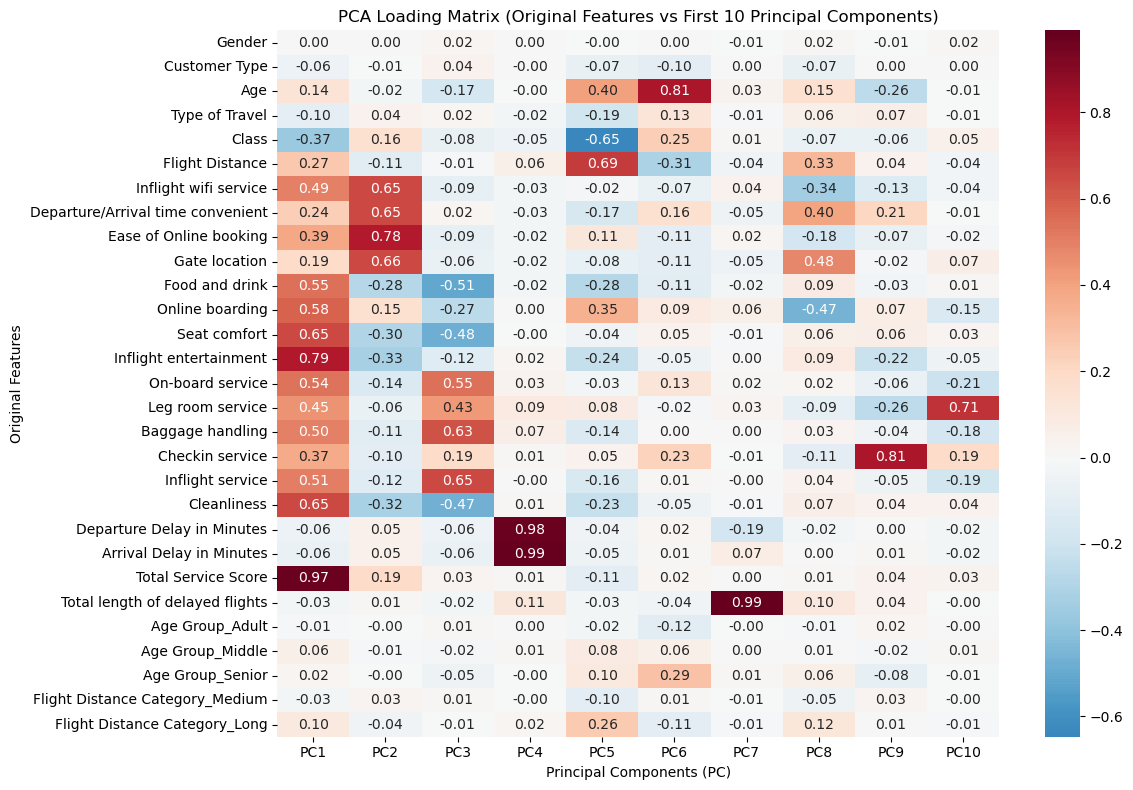

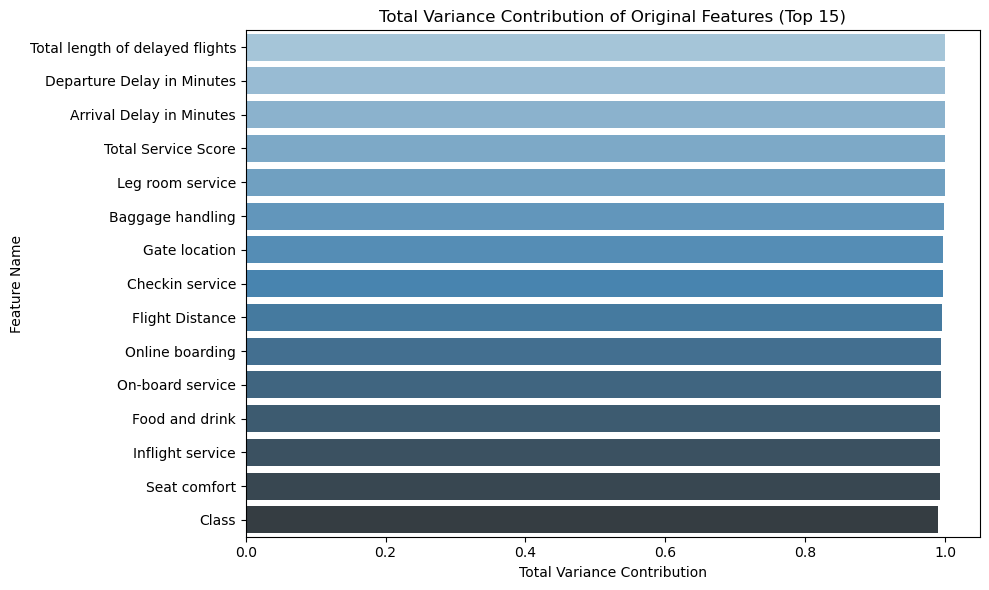

In [108]:
# 3.3 Visualization: Heatmap of PCA Loading Matrix (Original Features vs Principal Components)
plt.figure(figsize=(12, 8))
sns.heatmap(
    loadings_df.iloc[:, :10],  # Show only first 10 PCs to avoid overcrowding
    cmap="RdBu_r",
    center=0,
    annot=True,
    fmt=".2f",
    xticklabels=loadings_df.columns[:10],
    yticklabels=loadings_df.index
)
plt.title("PCA Loading Matrix (Original Features vs First 10 Principal Components)", fontsize=12)
plt.xlabel("Principal Components (PC)", fontsize=10)
plt.ylabel("Original Features", fontsize=10)
plt.tight_layout()
plt.show()

# 3.4 Visualization: Ranked total variance contribution of original features
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_contribution_df.head(15),  # Show top 15 features with highest contribution
    x="Total_Variance_Contribution",
    y="Feature_Name",
    palette="Blues_d"
)
plt.title("Total Variance Contribution of Original Features (Top 15)", fontsize=12)
plt.xlabel("Total Variance Contribution", fontsize=10)
plt.ylabel("Feature Name", fontsize=10)
plt.tight_layout()
plt.show()


In [109]:
# %%
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, 
    AdaBoostClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define all models with default parameters
models_round4 = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1)
}

In [110]:
# %%
all_results_round4 = []

for name, model in models_round4.items():
    print(f"🔄 Training {name} on PCA features...")
    
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:, 1]
    run_time = time.time() - start_time
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_proba)
    
    all_results_round4.append({
        'Model': name,
        'Features Used': X_train_pca.shape[1],
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc,
        'Running Time (s)': run_time
    })

print("✅ Round 4: All models trained on PCA features.")

🔄 Training Logistic Regression on PCA features...
🔄 Training KNN on PCA features...
🔄 Training GaussianNB on PCA features...
🔄 Training MLP on PCA features...
🔄 Training Decision Tree on PCA features...
🔄 Training Random Forest on PCA features...
🔄 Training Extra Trees on PCA features...
🔄 Training AdaBoost on PCA features...
🔄 Training Bagging on PCA features...
🔄 Training XGBoost on PCA features...
🔄 Training LightGBM on PCA features...
✅ Round 4: All models trained on PCA features.


In [111]:
# %%
results_df_round4 = pd.DataFrame(all_results_round4)
results_df_round4 = results_df_round4[[
    'Model', 'Features Used', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Running Time (s)'
]]
results_df_round4 = results_df_round4.sort_values('AUC', ascending=False).reset_index(drop=True)

print("\n📊 Round 4: PCA + Default Models")
display(results_df_round4)

# Optional: Save
results_df_round4.to_csv("round4_pca_results.csv", index=False)


📊 Round 4: PCA + Default Models


,Model,Features Used,Accuracy,Precision,Recall,F1 Score,AUC,Running Time (s)
0,MLP,19,0.945131,0.945774,0.926864,0.936224,0.989009,216.613918
1,XGBoost,19,0.928682,0.932420,0.901182,0.916535,0.980188,0.584881
2,Extra Trees,19,0.923430,0.950612,0.868924,0.907934,0.978279,2.503025
3,Random Forest,19,0.919453,0.933264,0.877366,0.904452,0.976297,11.952003
4,LightGBM,19,0.917407,0.921944,0.884831,0.903006,0.974777,0.788094
5,Bagging,19,0.912040,0.923070,0.870079,0.895791,0.965898,8.733677
6,KNN,19,0.914318,0.927503,0.870879,0.898300,0.962724,7.135811
7,AdaBoost,19,0.844390,0.844444,0.786812,0.814610,0.908043,32.556207
8,Logistic Regression,19,0.845780,0.839047,0.798187,0.818107,0.903815,0.116996
9,GaussianNB,19,0.822612,0.816282,0.763619,0.789073,0.879036,0.100157


# Round 5

In [112]:
# %% [markdown]
## Round 5: Best Parameters (Round 2) + Selected Features (Round 3)
# %%

# Get best parameters directly from Round 2 results (no modification)
best_params_by_model = {}
for result in all_results_round2:
    model_name = result['Model']
    # Standardize model names
    if 'Logistic' in model_name:
        key = 'Logistic Regression'
    elif 'KNN' in model_name:
        key = 'KNN'
    elif 'Gaussian' in model_name or 'Naive Bayes' in model_name:
        key = 'GaussianNB'
    elif 'MLP' in model_name:
        key = 'MLP'
    elif 'Decision Tree' in model_name:
        key = 'Decision Tree'
    elif 'Decision Tree (Pruned)' in model_name:
        key = 'Decision Tree (Pruned)'
    elif 'Random Forest' in model_name:
        key = 'Random Forest'
    elif 'Extra Trees' in model_name:
        key = 'Extra Trees'
    elif 'AdaBoost' in model_name:
        key = 'AdaBoost'
    elif 'Bagging' in model_name:
        key = 'Bagging'
    elif 'XGBoost' in model_name:
        key = 'XGBoost'
    elif 'LightGBM' in model_name:
        key = 'LightGBM'
    else:
        key = model_name.strip()
    best_params_by_model[key] = result['Best Parameters']

# Get selected features from Round 3 (using our unified feature selection)
selected_features = all_results_round3[0]['Selected Features']  # All models use same features now

# Which models need scaled features
scaled_models = ['Logistic Regression', 'KNN', 'GaussianNB', 'MLP']

# Train each model with best parameters and selected features
all_results_round5 = []

for model_name in best_params_by_model.keys():
    # Get best params for this model
    params = best_params_by_model[model_name]
    
    # Select appropriate dataset and features
    if model_name in scaled_models:
        X_train_sub = X_train_scaled_final[selected_features]
        X_test_sub = X_test_scaled_final[selected_features]
    else:
        X_train_sub = X_train_nonscaled_final[selected_features]
        X_test_sub = X_test_nonscaled_final[selected_features]
    
    # Initialize model with best parameters
    if model_name == 'Logistic Regression':
        model = LogisticRegression(**params, random_state=42, max_iter=1000)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(**params)
    elif model_name == 'GaussianNB':
        model = GaussianNB(**params)
    elif model_name == 'MLP':
        # Clean up non-parameter attributes that might be in best_params
        clean_params = {k: v for k, v in params.items() if k in MLPClassifier().get_params().keys()}
        model = MLPClassifier(**clean_params, random_state=42, max_iter=500)
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier(**params, random_state=42)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    elif model_name == 'Extra Trees':
        model = ExtraTreesClassifier(**params, random_state=42, n_jobs=-1)
    elif model_name == 'AdaBoost':
        model = AdaBoostClassifier(**params, random_state=42)
    elif model_name == 'Bagging':
        model = BaggingClassifier(**params, random_state=42, n_jobs=-1)
    elif model_name == 'XGBoost':
        model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    elif model_name == 'LightGBM':
        model = LGBMClassifier(**params, random_state=42, verbose=-1)
    else:
        continue  # Skip unknown models
    
    # Train and evaluate
    start_time = time.time()
    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)
    y_proba = model.predict_proba(X_test_sub)[:, 1]
    run_time = time.time() - start_time
    
    # Record results
    all_results_round5.append({
        'Model': model_name,
        'Features Used': len(selected_features),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1 Score': f1_score(y_test, y_pred, average='binary'),
        'AUC': roc_auc_score(y_test, y_proba),
        'Running Time (s)': run_time
    })
    print(f"✅ Completed {model_name} - AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Create results dataframe
results_df_round5 = pd.DataFrame(all_results_round5)
results_df_round5 = results_df_round5.sort_values('AUC', ascending=False).reset_index(drop=True)
print("\n📊 Round 5 Results:")
display(results_df_round5)
results_df_round5.to_csv("round5_results.csv", index=False)

✅ Completed Logistic Regression - AUC: 0.9049
✅ Completed KNN - AUC: 0.9688
✅ Completed GaussianNB - AUC: 0.9168
✅ Completed Decision Tree - AUC: 0.9638
✅ Completed Random Forest - AUC: 0.9819
✅ Completed Extra Trees - AUC: 0.9822
✅ Completed AdaBoost - AUC: 0.9599
✅ Completed Bagging - AUC: 0.9801
✅ Completed XGBoost - AUC: 0.9845
✅ Completed LightGBM - AUC: 0.9847
✅ Completed MLP - AUC: 0.9846

📊 Round 5 Results:


,Model,Features Used,Accuracy,Precision,Recall,F1 Score,AUC,Running Time (s)
0,LightGBM,7,0.935246,0.943991,0.904648,0.923901,0.984671,0.666689
1,MLP,7,0.935053,0.942651,0.905625,0.923767,0.984609,50.616861
2,XGBoost,7,0.934319,0.943372,0.903048,0.922770,0.984493,0.766591
3,Extra Trees,7,0.932157,0.934480,0.907491,0.920788,0.982240,1.863584
4,Random Forest,7,0.931346,0.935312,0.904559,0.919678,0.981873,2.315601
5,Bagging,7,0.929106,0.932966,0.901626,0.917028,0.980085,6.652728
6,KNN,7,0.927987,0.935274,0.896294,0.915370,0.968753,4.293889
7,Decision Tree,7,0.929029,0.935597,0.898516,0.916682,0.963770,0.254312
8,AdaBoost,7,0.895359,0.891056,0.864925,0.877796,0.959861,10.806044
9,GaussianNB,7,0.852691,0.824294,0.840043,0.832094,0.916762,0.031714


# Round 6

In [113]:
r2_best_params = {}

for res in all_results_round2:
    name = res['Model']
    # Normalize name to match model keys
    if 'Logistic' in name:
        key = 'Logistic Regression'
    elif 'KNN' in name:
        key = 'KNN'
    elif 'GaussianNB' in name:
        key = 'GaussianNB'
    elif 'MLP' in name:
        key = 'MLP'
    elif 'Decision Tree' in name:
        key = 'Decision Tree'
    elif 'Random Forest' in name:
        key = 'Random Forest'
    elif 'Extra Trees' in name:
        key = 'Extra Trees'
    elif 'AdaBoost' in name:
        key = 'AdaBoost'
    elif 'Bagging' in name:
        key = 'Bagging'
    elif 'XGBoost' in name:
        key = 'XGBoost'
    elif 'LightGBM' in name:
        key = 'LightGBM'
    else:
        key = name
    
    r2_best_params[key] = res['Best Parameters']

print(f"✅ Loaded best parameters for {len(r2_best_params)} models from Round 2.")

✅ Loaded best parameters for 11 models from Round 2.


In [114]:
def get_tuned_model_for_pca(model_name, params):
    """Initialize model with Round 2 best params, suitable for PCA input"""
    if model_name == 'Logistic Regression':
        return LogisticRegression(**params, random_state=42, max_iter=1000)
    elif model_name == 'KNN':
        return KNeighborsClassifier(**params)
    elif model_name == 'GaussianNB':
        return GaussianNB(**params)
    elif model_name == 'MLP':
        mlp_params = params.copy()
        mlp_params.pop('n_iter_', None)
        return MLPClassifier(**mlp_params, random_state=42, max_iter=500)
    elif model_name == 'Decision Tree':
        return DecisionTreeClassifier(**params, random_state=42)
    elif model_name == 'Random Forest':
        return RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    elif model_name == 'Extra Trees':
        return ExtraTreesClassifier(**params, random_state=42, n_jobs=-1)
    elif model_name == 'AdaBoost':
        return AdaBoostClassifier(**params, random_state=42)
    elif model_name == 'Bagging':
        return BaggingClassifier(**params, random_state=42, n_jobs=-1)
    elif model_name == 'XGBoost':
        return XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    elif model_name == 'LightGBM':
        return LGBMClassifier(**params, random_state=42, verbose=-1)
    else:
        raise ValueError(f"Unknown model: {model_name}")

In [115]:
all_results_round6 = []

for name in r2_best_params.keys():
    print(f"🔄 Round 6: {name} on PCA features...")
    
    # Get tuned model
    model = get_tuned_model_for_pca(name, r2_best_params[name])
    
    # Train and evaluate on PCA data
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:, 1]
    run_time = time.time() - start_time
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_proba)
    
    all_results_round6.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc,
        'Running Time (s)': run_time,
        'PCA Components': X_train_pca.shape[1]
    })

print("✅ Round 6 completed.")

🔄 Round 6: Logistic Regression on PCA features...
🔄 Round 6: KNN on PCA features...
🔄 Round 6: GaussianNB on PCA features...
🔄 Round 6: Decision Tree on PCA features...
🔄 Round 6: Random Forest on PCA features...
🔄 Round 6: Extra Trees on PCA features...
🔄 Round 6: AdaBoost on PCA features...
🔄 Round 6: Bagging on PCA features...
🔄 Round 6: XGBoost on PCA features...
🔄 Round 6: LightGBM on PCA features...
🔄 Round 6: MLP on PCA features...
✅ Round 6 completed.


### Final Results: Round 6

In [116]:
results_df_round6 = pd.DataFrame(all_results_round6)
results_df_round6 = results_df_round6[[
    'Model', 'PCA Components', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Running Time (s)'
]]
results_df_round6 = results_df_round6.sort_values('AUC', ascending=False).reset_index(drop=True)

print("\n📊 Round 6: Tuned Models on PCA Features")
display(results_df_round6)

# Save
results_df_round6.to_csv("round6_tuned_on_pca.csv", index=False)


📊 Round 6: Tuned Models on PCA Features


,Model,PCA Components,Accuracy,Precision,Recall,F1 Score,AUC,Running Time (s)
0,MLP,19,0.952158,0.971291,0.917000,0.943365,0.991990,38.267373
1,LightGBM,19,0.929724,0.934020,0.901982,0.917722,0.981596,1.298180
2,XGBoost,19,0.930188,0.936743,0.900116,0.918064,0.981222,1.721561
3,Bagging,19,0.924550,0.939088,0.883675,0.910539,0.977413,47.580524
4,Random Forest,19,0.917986,0.933929,0.873012,0.902444,0.975059,20.325288
5,KNN,19,0.919453,0.933838,0.876744,0.904391,0.973145,22.880870
6,Extra Trees,19,0.908526,0.942518,0.840754,0.888732,0.972642,3.633299
7,AdaBoost,19,0.858483,0.861265,0.803786,0.831533,0.921565,131.332203
8,Logistic Regression,19,0.845780,0.839047,0.798187,0.818107,0.903808,0.506935
9,GaussianNB,19,0.822612,0.816282,0.763619,0.789073,0.879036,0.143678


### sample reason for designing Round 6:
Round 2 vs Round 6  
Performance difference of tuned models on original features vs. PCA features  

Round 4 vs Round 6  
Improvement of tuned models over default models in PCA space  

Performance of tree-based models on PCA features  

Verify whether PCA harms the performance of tree-based models (typically causes a drop)  

💡 Expected outcomes:  

- LR, KNN, MLP: May perform better with PCA (due to noise reduction and redundancy removal)  
- Tree-based models: Performance may degrade (as PCA can disrupt the separability inherent in the original features)